In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium

from sklearn import preprocessing 

# minus 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [ ]:
df = pd.read_csv('./서울시 지하철 호선별 역별 시간대별 승하차 인원 정보 - 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv'
                 ) #encoding = 'cp949'

In [ ]:
df.describe()

,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
count,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,46552.00000,46552.000000,...,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,46552.000000,4.655200e+04
mean,201797.435900,196.165041,2.813198,5249.256552,1318.698745,10771.636020,7134.440196,28158.969088,16330.76624,32033.777604,...,9962.066850,700.166803,2989.650262,4.233481,98.922216,0.229120,1.277367,0.020687,0.078686,2.018058e+07
std,192.350756,642.324971,7.341470,6113.397293,1479.626263,10695.262445,7700.207461,29286.129364,21175.30080,34331.611138,...,11368.740352,1635.522997,3835.690175,38.103152,356.616851,17.298247,12.918212,0.772437,3.231233,1.916480e+04
min,201501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.015121e+07
25%,201609.000000,3.000000,0.000000,1451.000000,385.000000,3404.750000,2332.750000,7910.000000,4573.00000,9685.000000,...,2913.000000,20.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016101e+07
50%,201806.000000,19.000000,0.000000,3429.000000,902.000000,7644.500000,4889.500000,19489.500000,9490.50000,22160.000000,...,6662.000000,193.000000,1795.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.018070e+07
75%,202001.000000,107.000000,2.000000,6743.000000,1666.000000,14541.250000,9120.000000,38095.250000,19265.75000,42550.000000,...,12966.000000,693.000000,4022.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2.020020e+07
max,202108.000000,13585.000000,218.000000,59655.000000,15843.000000,99232.000000,87300.000000,294593.000000,238513.00000,386398.000000,...,134948.000000,33676.000000,46252.000000,2805.000000,6651.000000,3082.000000,863.000000,94.000000,312.000000,2.021090e+07


In [ ]:
df.shape

(46552, 52)

In [ ]:
df.isnull().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64

# 컬럼별 데이터 확인

In [ ]:
df['사용월'].nunique()

80

In [ ]:
df['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

In [ ]:
df.dtypes

사용월              int64
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
10시-11시 승차인원     int64
10시-11시 하차인원     int64
11시-12시 승차인원     int64
11시-12시 하차인원     int64
12시-13시 승차인원     int64
12시-13시 하차인원     int64
13시-14시 승차인원     int64
13시-14시 하차인원     int64
14시-15시 승차인원     int64
14시-15시 하차인원     int64
15시-16시 승차인원     int64
15시-16시 하차인원     int64
16시-17시 승차인원     int64
16시-17시 하차인원     int64
17시-18시 승차인원     int64
17시-18시 하차인원     int64
18시-19시 승차인원     int64
18시-19시 하차인원     int64
19시-20시 승차인원     int64
19시-20시 하차인원     int64
20시-21시 승차인원     int64
20시-21시 하차인원     int64
21시-22시 승차인원     int64
21시-22시 하차인원     int64
22시-23시 승차인원     int64
22시-23시 하차인원     int64
23시-24시 승차인원     int64
23시-24시 하차인원     int64
00시-01시 승차인

In [ ]:
# 사용월을 문자열로 형변환 
df['사용월'] = df['사용월'].astype('str')
df.dtypes

사용월             object
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
10시-11시 승차인원     int64
10시-11시 하차인원     int64
11시-12시 승차인원     int64
11시-12시 하차인원     int64
12시-13시 승차인원     int64
12시-13시 하차인원     int64
13시-14시 승차인원     int64
13시-14시 하차인원     int64
14시-15시 승차인원     int64
14시-15시 하차인원     int64
15시-16시 승차인원     int64
15시-16시 하차인원     int64
16시-17시 승차인원     int64
16시-17시 하차인원     int64
17시-18시 승차인원     int64
17시-18시 하차인원     int64
18시-19시 승차인원     int64
18시-19시 하차인원     int64
19시-20시 승차인원     int64
19시-20시 하차인원     int64
20시-21시 승차인원     int64
20시-21시 하차인원     int64
21시-22시 승차인원     int64
21시-22시 하차인원     int64
22시-23시 승차인원     int64
22시-23시 하차인원     int64
23시-24시 승차인원     int64
23시-24시 하차인원     int64
00시-01시 승차인

In [ ]:
# 불필요한 컬럼 삭제
df.drop(columns = ['작업일자'], inplace=True)

# 시간 승차/하차

In [ ]:
# 승차테이블 만들기
df.head(2)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,1633,5983,7,1043,2,2,0,2,0,0
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,577,1759,4,827,0,0,0,0,0,0


In [ ]:
# 공통컬럼 df1 
# 승차컬럼 df2
# 하차컬럼 df3

In [ ]:
df1 = df[['사용월', '호선명','지하철역']]

In [ ]:
# df_sam['시장/마트 이름'].str.contains(mart)
columns_lis = df.columns
lis_ss=[]
for i in range(len(columns_lis)):
  if columns_lis.str.contains('승차')[i] == True:
    lis_ss.append(columns_lis[i])
  else: 
    pass   

lis_ss

['04시-05시 승차인원',
 '05시-06시 승차인원',
 '06시-07시 승차인원',
 '07시-08시 승차인원',
 '08시-09시 승차인원',
 '09시-10시 승차인원',
 '10시-11시 승차인원',
 '11시-12시 승차인원',
 '12시-13시 승차인원',
 '13시-14시 승차인원',
 '14시-15시 승차인원',
 '15시-16시 승차인원',
 '16시-17시 승차인원',
 '17시-18시 승차인원',
 '18시-19시 승차인원',
 '19시-20시 승차인원',
 '20시-21시 승차인원',
 '21시-22시 승차인원',
 '22시-23시 승차인원',
 '23시-24시 승차인원',
 '00시-01시 승차인원',
 '01시-02시 승차인원',
 '02시-03시 승차인원',
 '03시-04시 승차인원']

In [ ]:
columns = lis_ss
columns

['04시-05시 승차인원',
 '05시-06시 승차인원',
 '06시-07시 승차인원',
 '07시-08시 승차인원',
 '08시-09시 승차인원',
 '09시-10시 승차인원',
 '10시-11시 승차인원',
 '11시-12시 승차인원',
 '12시-13시 승차인원',
 '13시-14시 승차인원',
 '14시-15시 승차인원',
 '15시-16시 승차인원',
 '16시-17시 승차인원',
 '17시-18시 승차인원',
 '18시-19시 승차인원',
 '19시-20시 승차인원',
 '20시-21시 승차인원',
 '21시-22시 승차인원',
 '22시-23시 승차인원',
 '23시-24시 승차인원',
 '00시-01시 승차인원',
 '01시-02시 승차인원',
 '02시-03시 승차인원',
 '03시-04시 승차인원']

In [ ]:
# solution
df2 = df.iloc[:, 3::2]
df3 = df.iloc[:, 4::2]
df2

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
0,415,10380,7880,12037,16637,15671,13922,15675,18244,19566,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,84,2861,3286,5128,8066,7541,9130,13369,18112,21526,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,483,7963,10871,31643,49003,36383,35273,41477,48720,50740,...,152659,72119,47289,51106,27974,7756,21,1,0,0
3,6,1597,2727,5971,6884,7541,8328,12240,13561,15934,...,119064,41635,31787,27796,13739,2462,3,0,0,0
4,247,6828,7333,14821,20523,14881,13551,15578,16289,17701,...,48482,18413,11610,9764,5955,1352,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,0,177,642,1292,1479,1438,1408,1179,1268,2081,...,2304,1332,1002,942,270,111,3,0,0,0
46548,1,292,415,537,823,980,1025,720,571,684,...,563,175,156,53,71,8,3,0,0,0
46549,14,4929,8539,22160,25792,14328,11117,10340,10853,10510,...,8399,6449,4652,3849,3062,1619,86,0,0,0
46550,0,161,368,1227,910,897,1009,904,1086,1371,...,1617,845,492,420,309,107,8,0,0,0


In [ ]:
df2.columns = df2.columns.str.split(' ').str[0]   # 띄어쓰기 사이 나누고 첫번째(str[0])것 선택
#['04시-05시', '하차인원']
# df2.columns
df_in = pd.concat([df1, df2], axis= 1)
df_in

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0
3,202108,1호선,시청,6,1597,2727,5971,6884,7541,8328,...,119064,41635,31787,27796,13739,2462,3,0,0,0
4,202108,1호선,신설동,247,6828,7333,14821,20523,14881,13551,...,48482,18413,11610,9764,5955,1352,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,177,642,1292,1479,1438,1408,...,2304,1332,1002,942,270,111,3,0,0,0
46548,201501,중앙선,원덕,1,292,415,537,823,980,1025,...,563,175,156,53,71,8,3,0,0,0
46549,201501,중앙선,중랑,14,4929,8539,22160,25792,14328,11117,...,8399,6449,4652,3849,3062,1619,86,0,0,0
46550,201501,중앙선,팔당,0,161,368,1227,910,897,1009,...,1617,845,492,420,309,107,8,0,0,0


In [ ]:
df2.columns

Index(['04시-05시', '05시-06시', '06시-07시', '07시-08시', '08시-09시', '09시-10시',
       '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시',
       '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시',
       '22시-23시', '23시-24시', '00시-01시', '01시-02시', '02시-03시', '03시-04시'],
      dtype='object')

In [ ]:
# 하차테이블 만들기
df3.columns = df3.columns.str.split(' ').str[0]
df_out = pd.concat([df1, df3], axis= 1)
df_out

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,11,1815,5352,9885,19783,19192,17298,...,16304,15398,10356,8870,7191,5983,1043,2,2,0
1,202108,1호선,동묘앞,3,918,4614,8004,18779,15213,17602,...,9210,5827,3835,3839,3706,1759,827,0,0,0
2,202108,1호선,서울역,11,5533,31479,73669,149249,94786,50691,...,61655,38909,25080,21490,13638,4968,444,1,0,0
3,202108,1호선,시청,0,4399,17957,53669,141150,60972,24743,...,11317,5636,3793,3501,2205,822,72,2,0,0
4,202108,1호선,신설동,6,2721,9771,21765,52910,28274,18729,...,22904,15802,10231,9428,7268,3747,390,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,56,403,675,1390,3270,3673,...,1218,1457,769,760,775,633,222,0,0,0
46548,201501,중앙선,원덕,0,4,46,248,344,273,497,...,721,714,612,404,339,383,157,0,0,0
46549,201501,중앙선,중랑,1,424,2084,3027,6573,6133,5605,...,19547,21424,14362,11678,11060,6501,1617,0,0,0
46550,201501,중앙선,팔당,0,50,149,523,1151,2931,3932,...,822,749,320,319,339,336,85,0,0,0


최근월을 기준으로 승하차 데이터 프레임 생성

In [ ]:
df_in_202108 = df_in[df_in['사용월'] == '202108']
df_out_202108 = df_out[df_out['사용월'] == '202108']

In [ ]:
# 출근시간에 가장 많은 사람이 승차하는 역은 어디일까(08시-09시)
df_in_202108.nlargest(10, '08시-09시')[['지하철역', '08시-09시']]
# DataFrame.nlargest(n, columns, keep='first')
# Return the first n rows ordered by columns in descending order.
# first : prioritize the first occurrence(s)

,지하철역,08시-09시
37,신림,267128
14,구로디지털단지,153411
28,서울대입구(관악구청),150090
83,연신내,132615
133,까치산,130443
52,잠실(송파구청),128005
175,화곡,121310
112,쌍문,112812
36,신도림,111452
35,신대방,110766


In [ ]:
# 출근시간에 가장 많은 사람이 하차하는 역은 어디일까 09시 - 10시
df_out_202108.nlargest(10, '09시-10시')[['지하철역', '09시-10시']]

,지하철역,09시-10시
10,강남,274355
43,역삼,226437
215,가산디지털단지,188412
30,선릉,178766
26,삼성(무역센터),172539
80,압구정,139283
31,성수,124935
78,신사,122905
13,교대(법원.검찰청),121163
14,구로디지털단지,121092


In [ ]:
# 퇴근시간에 가장많은 사람이 승차하는 역은 어디일까 (18시-19시)
df_in_202108.nlargest(10, '18시-19시')[['지하철역', '18시-19시']]

,지하철역,18시-19시
10,강남,302398
215,가산디지털단지,283125
30,선릉,245318
43,역삼,239209
26,삼성(무역센터),230299
50,을지로입구,207093
31,성수,202624
14,구로디지털단지,192537
82,양재(서초구청),174296
128,광화문(세종문화회관),173772


# 강남역 최근 시간대별 승하차 정보 분석

In [ ]:
# df_in_202108 에서 강남역 추출
df_gangnam_in = df_in_202108[(df_in_202108['지하철역']=='강남')].iloc[:, 3:]
df_gangnam_in

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
10,64,4993,14177,31783,50239,40611,44108,59573,75942,88926,...,302398,178242,138452,157847,105997,12509,5,2,0,0


In [ ]:
# melt
df_gangnam_in = df_gangnam_in.melt()
df_gangnam_in 

,variable,value
0,04시-05시,64
1,05시-06시,4993
2,06시-07시,14177
3,07시-08시,31783
4,08시-09시,50239
5,09시-10시,40611
6,10시-11시,44108
7,11시-12시,59573
8,12시-13시,75942
9,13시-14시,88926


In [ ]:
df_gangnam_in.columns = ['시간대', '승차건수']
df_gangnam_in.sort_values('승차건수')

,시간대,승차건수
23,03시-04시,0
22,02시-03시,0
21,01시-02시,2
20,00시-01시,5
0,04시-05시,64
1,05시-06시,4993
19,23시-24시,12509
2,06시-07시,14177
3,07시-08시,31783
5,09시-10시,40611


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


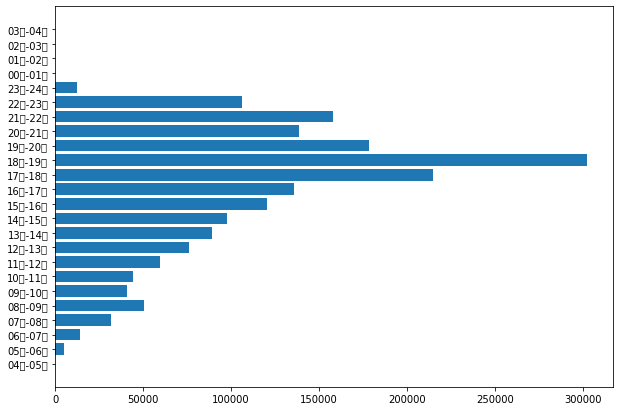

In [ ]:
# 시간대별 승차인원 시각화 하기
plt.figure(figsize=(10,7))
plt.barh(df_gangnam_in['시간대'], df_gangnam_in['승차건수'])
plt.show()

# 지하철 시간대별, 역별 이용현황

In [ ]:
# 최근(202108) 데이터 중에서 승차정보 집계 데이터 만들기
df_in_202108_agg = df_in_202108.copy()

In [ ]:
df_in_202108_agg.head(3)

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0


In [ ]:
# 지하철역 컬럼을 인덱스로 지정
df_in_202108_agg.index = df_in_202108_agg['지하철역']
df_in_202108_agg

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
동묘앞,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
서울역,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0
시청,202108,1호선,시청,6,1597,2727,5971,6884,7541,8328,...,119064,41635,31787,27796,13739,2462,3,0,0,0
신설동,202108,1호선,신설동,247,6828,7333,14821,20523,14881,13551,...,48482,18413,11610,9764,5955,1352,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
원덕,202108,중앙선,원덕,72,277,689,643,883,755,661,...,544,442,215,94,25,0,0,0,0,0
중랑,202108,중앙선,중랑,200,5961,8782,19739,18610,13213,8053,...,6531,4213,2938,2513,1654,430,5,0,0,0
지평,202108,중앙선,지평,0,1,2,347,218,18,325,...,35,215,2,27,14,0,0,0,0,0


In [ ]:
# 불필요한 컬럼 '사용월', '호선명', '지하철역'
df_in_202108_agg.drop(columns = ['사용월', '호선명', '지하철역'], inplace=True)
df_in_202108_agg.head(3)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,415,10380,7880,12037,16637,15671,13922,15675,18244,19566,...,20332,13464,10336,9669,6514,1633,7,2,0,0
동묘앞,84,2861,3286,5128,8066,7541,9130,13369,18112,21526,...,19551,8704,5031,4235,2678,577,4,0,0,0
서울역,483,7963,10871,31643,49003,36383,35273,41477,48720,50740,...,152659,72119,47289,51106,27974,7756,21,1,0,0


In [ ]:
# add sum row
df_in_202108_agg.loc['sum'] = df_in_202108_agg.apply('sum', axis=0)
df_in_202108_agg.tail(3)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
팔당,1,212,788,1261,1267,1123,1208,1127,1339,1521,...,2857,2067,2057,1927,559,56,0,0,0,0
회기,719,11133,18619,47471,59922,39563,31469,31674,33153,30224,...,38115,21128,17210,17437,13269,3634,63,0,0,0
sum,251184,5359790,10785288,26014796,29279058,17924002,13376224,13525262,14554446,14603864,...,34382618,17342940,13223176,12065946,7705146,1488730,12172,52,6,2


In [ ]:
# add sum column
df_in_202108_agg['sum'] = df_in_202108_agg.apply('sum', axis=1)
df_in_202108_agg.head(3)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시,sum
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,415,10380,7880,12037,16637,15671,13922,15675,18244,19566,...,13464,10336,9669,6514,1633,7,2,0,0,274678
동묘앞,84,2861,3286,5128,8066,7541,9130,13369,18112,21526,...,8704,5031,4235,2678,577,4,0,0,0,229111
서울역,483,7963,10871,31643,49003,36383,35273,41477,48720,50740,...,72119,47289,51106,27974,7756,21,1,0,0,938002


In [ ]:
# 시간대별 승차건수 
s_in = df_in_202108_agg.loc['sum'][:-1].sort_values()  # [:-1] -> remove sum column(useless)
# this loc returns the row as a Series.
s_in

03시-04시           2
02시-03시           6
01시-02시          52
00시-01시       12172
04시-05시      251184
23시-24시     1488730
05시-06시     5359790
22시-23시     7705146
06시-07시    10785288
21시-22시    12065946
20시-21시    13223176
10시-11시    13376224
11시-12시    13525262
12시-13시    14554446
13시-14시    14603864
14시-15시    14628720
15시-16시    16109124
19시-20시    17342940
09시-10시    17924002
16시-17시    18571454
17시-18시    25693238
07시-08시    26014796
08시-09시    29279058
18시-19시    34382618
Name: sum, dtype: int64

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


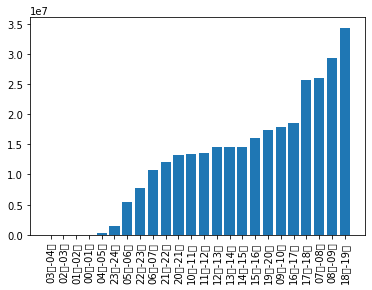

In [ ]:
x = s_in.index
y = s_in.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 지하철 역별 승차건수
s_in2 = df_in_202108_agg['sum'][:-1].sort_values()
s_in2   # it just picks column 'sum' without loc

지하철역
신내                3
검암                4
지축                4
계양                5
창동                6
             ...   
홍대입구        1247932
구로디지털단지     1331304
신림          1503604
잠실(송파구청)    1539356
강남          1874711
Name: sum, Length: 607, dtype: int64

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50516 (\N{HANGUL SYLLABLE AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython

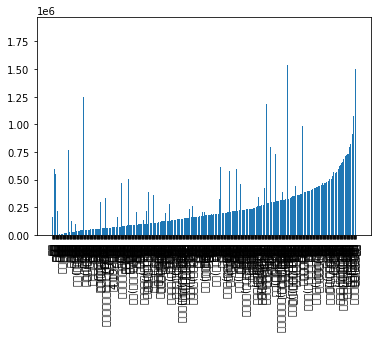

In [ ]:
x = s_in2.index
y = s_in2.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()